### IMPORTING NECESSARY PACKAGES

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### UPLOADING AND CLEANING THE DATASET

In [10]:
control_group_ctr = pd.read_csv("../Data/control_group.csv")
control_group_ctr.fillna(0,inplace=True)
test_group_ctr = pd.read_csv("../Data/test_group.csv")
test_group_ctr.fillna(0, inplace = True)

### ADDING A NEW COLUMN NAMED "GROUP" IN BOTH THE DATASETS

In [11]:
control_group_ctr['Group'] = 'Control'
test_group_ctr['Group'] = 'Test'

### MERGING BOTH THE DATASETS FOR PROCESSING

In [12]:
combined = pd.concat([control_group_ctr,test_group_ctr])

### CALCULATING THE CLICK-THROUGH RATE (CTR) FOR ALL THE ROWS

In [13]:
combined['CTR'] = combined['# of Website Clicks'] / combined['# of Impressions']
combined.fillna(0, inplace = True)

### SEPERATING BOTH THE GROUPS TO CALCULATE MEAN 

In [14]:
control_group_ctr = combined[combined['Group'] == 'Control']
test_group_ctr = combined[combined['Group'] == 'Test']

control_mean_ctr = control_group_ctr['CTR'].mean()
test_mean_ctr = test_group_ctr['CTR'].mean()

### PERFORMING A 2-TAILED T-TEST TO CALCULATE THE P-VALUE

In [15]:
t_stat, p_value = ttest_ind(control_group_ctr['CTR'],test_group_ctr['CTR'], equal_var=False)
print(f"t-value : {str(t_stat)}")
print(f"p-value : {str(p_value)}")

t-value : -4.086552361817828
p-value : 0.0002413870459964674


### COMPARING THE VALUE OF 'P' WITH "ALPHA = 0.05" TO DETERMINE WHETHER TO REJECT THE NULL HYPOTHESIS OR FAIL TO REJECT THE NULL HYPOTHESIS

In [16]:
final_test_result = "Reject the null hypothesis. The difference in CTR is statistically significant" if p_value < 0.05 else "Fail to reject the null hypothesis. The difference in CTR is not statistically significant"

print(final_test_result)

Reject the null hypothesis. The difference in CTR is statistically significant


### HISTOGRAM TO SHOW HOW THE "CTR" VALUES ARE DISTRIBUTED ACROSS THE DATA

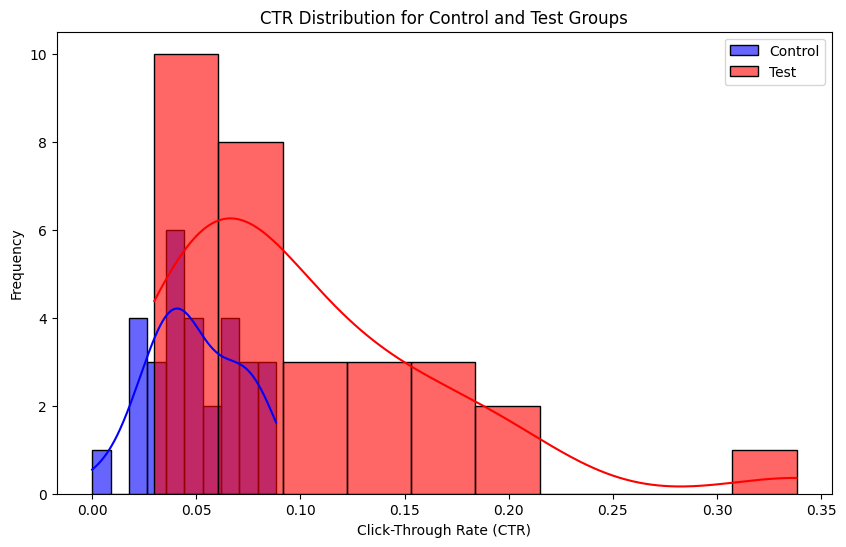

In [17]:
plt.figure(figsize = (10,6))
sns.histplot(data = control_group_ctr['CTR'], color = 'b', label = 'Control', kde = True, bins = 10, alpha = 0.6)
sns.histplot(data = test_group_ctr['CTR'], color = 'r', label = 'Test', kde = True, bins = 10, alpha = 0.6)
plt.title('CTR Distribution for Control and Test Groups')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Frequency')
plt.legend()

### BAR GRAPH TO COMPARE THE AVERAGE "CTR" OF THE "CONTROL" AND "TEST" GROUP

Text(0, 0.5, 'Mean  CTR')

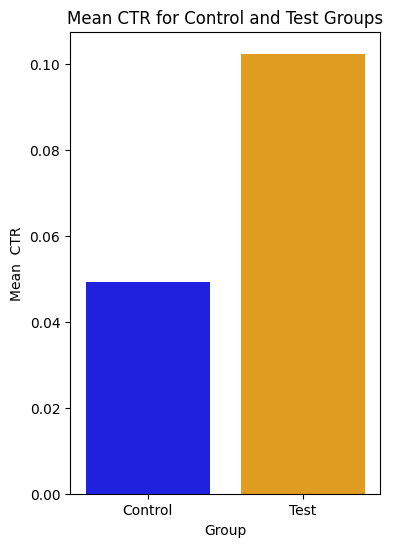

In [18]:
plt.figure(figsize = (4,6))
sns.barplot(x=['Control', 'Test'], y=[control_mean_ctr,test_mean_ctr], hue = ['Control', 'Test'], palette=['blue', 'orange']);
plt.title('Mean CTR for Control and Test Groups')
plt.xlabel('Group')
plt.ylabel('Mean  CTR')

### CALCULATING THE CONVERSION RATE (CR) FOR ALL THE ROWS

In [19]:
combined['CR'] = combined['# of Purchase'] / combined['# of Website Clicks']
combined.fillna(0, inplace = True)

### SEPERATING BOTH THE GROUPS TO CALCULATE MEAN

In [20]:
control_group_cr = combined[combined['Group'] == 'Control']
test_group_cr = combined[combined['Group'] == 'Test']

control_mean_cr = control_group_cr['CR'].mean()
test_mean_cr = test_group_cr['CR'].mean()

### PERFORMING A 2-TAILED T-TEST TO CALCULATE THE P-VALUE

In [21]:
t_stat_cr, p_value_cr = ttest_ind(control_group_cr['CR'], test_group_cr['CR'], equal_var=False)
p_value_cr

np.float64(0.22614981196513134)

### COMPARING THE VALUE OF 'P' WITH "ALPHA = 0.05" TO DETERMINE WHETHER TO REJECT THE NULL HYPOTHESIS OR FAIL TO REJECT THE NULL HYPOTHESIS

In [22]:
final_test_result_cr = "Reject the null hypothesis: The CRs are significantly different." if p_value_cr < 0.05 else "Fail to reject the null hypothesis: No significant difference in CRs."
final_test_result_cr

'Fail to reject the null hypothesis: No significant difference in CRs.'

### HISTOGRAM TO SHOW HOW THE "CR" VALUES ARE DISTRIBUTED ACROSS THE DATA

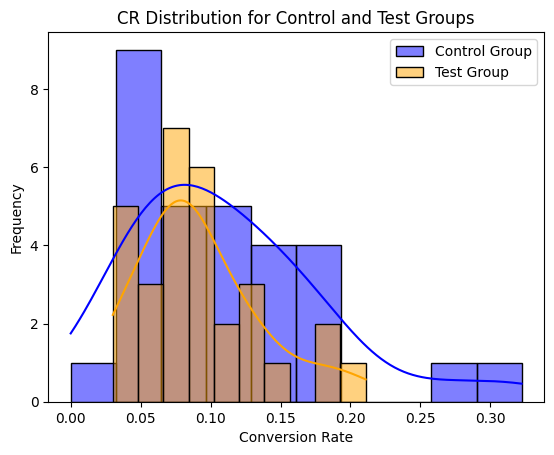

In [23]:
sns.histplot(control_group_cr['CR'], kde=True, color='blue', label='Control Group', bins=10)
sns.histplot(test_group_cr['CR'], kde=True, color='orange', label='Test Group', bins=10)
plt.title('CR Distribution for Control and Test Groups')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()

### BAR GRAPH TO COMPARE THE AVERAGE "CR" OF THE "CONTROL" AND "TEST" GROUP

Text(0.5, 0, 'Group')

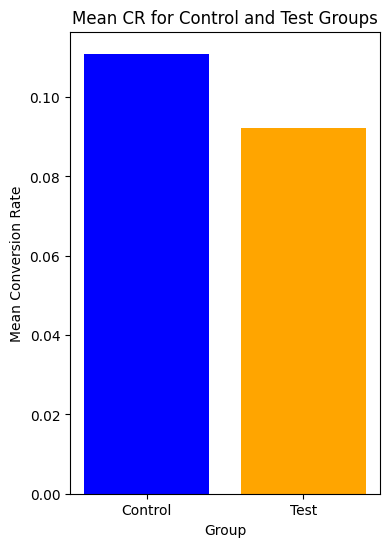

In [24]:
plt.figure(figsize = (4,6))
plt.bar(['Control', 'Test'], [control_mean_cr, test_mean_cr], color=['blue', 'orange'])
plt.title('Mean CR for Control and Test Groups')
plt.ylabel('Mean Conversion Rate')
plt.xlabel('Group')